With this notebook, my goal was to replicate figure 1 from Kiakotou et al, 2008.
In particular, having failed to perfectly replicate the power spectra which
Ariel gave me, I wondered if there might be a mistake somewhere in inputting the
model. It was a long shot, but I figured that if I simply tried to encode a
different setup, I might not see the same error.

The results of this notebook are unhelpful. Although the plots seem to align
more closely with the "ground truth" when it comes to frequency (or number of
oscillations), the plots disagree in magnitude with the reference paper. So it's
not clear to me that I was really able to learn anything with this notebook.

I don't think I spent too much time interrogating these magnitude differences,
so it's possible that I could come back to this notebook at some point to see
if I have made a mistake somewhere.

There's also a weird segfault case that I discovered. It's frozen in a comment
at the end. I could never figure out why this code should be rejected.
Naturally, I tested the code in a shell to get more helpful feedback, but I was
still not able to determine what logical mistake I was making.

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

import camb
from camb import model, initialpower
import pandas as pd
import re

In [5]:
import importlib.util
import sys
spec = importlib.util.spec_from_file_location(
    "spectra", "../shared/spectra.py")
spectra = importlib.util.module_from_spec(spec)
sys.modules["spectra"] = spectra
spec.loader.exec_module(spectra)

In [6]:
from copy import deepcopy as dc
# z_in = parse_redshifts(0)
z_in = np.array([0]) # I don't see a redshift in the paper;
# are they always assuming z=0?

model0 = spectra.cosm.loc[0]

print(model0)

modelK = dc(model0)
# Now it's safe to modify this object into the Kiakotou stuff.
modelK["OmM"] = 0.25
modelK["OmB"] = 0.04
modelK["h"] = 0.7

omnuh2_in = modelK["OmM"] * 0.04
#omnuh2_in = 0.002

# Derived quantities
modelK["ombh2"] = modelK["OmB"] * modelK["h"] ** 2
OmCDM_K = modelK["OmM"] - modelK["OmB"]
modelK["omch2"] = OmCDM_K * modelK["h"] ** 2

print()
print(modelK)

modelA = dc(model0)
modelA["h"] = 0.7
modelA["ombh2"] = modelA["OmB"] * modelA["h"] ** 2
OmCDM_A = modelA["OmM"] - modelA["OmB"]
modelA["omch2"] = OmCDM_A * modelA["h"] ** 2

print()
print(modelA)

modelB = dc(model0)
modelB["OmM"] = 0.25
OmCDM_B = modelB["OmM"] - modelB["OmB"]
modelB["omch2"] = OmCDM_B * modelB["h"] ** 2

print()
print(modelB)

modelC = dc(model0)
modelC["OmB"] = 0.04

modelC["ombh2"] = modelC["OmB"] * modelC["h"] ** 2
OmCDM_C = modelC["OmM"] - modelC["OmB"]
modelC["omch2"] = OmCDM_C * modelC["h"] ** 2

print()
print(modelC)

modelD = dc(model0)
modelD["ombh2"] = modelD["OmB"] * modelD["h"] ** 2
OmCDM_D = modelD["OmM"] - modelD["OmB"]
modelD["omch2"] = OmCDM_D * modelD["h"] ** 2

print()
print(modelD)

Name      Columbus_0
ombh2       0.022445
omch2       0.120567
n_s             0.96
A_s              0.0
OmB             0.05
OmC         0.268584
OmM         0.318584
OmK              0.0
OmL         0.681416
h               0.67
w0              -1.0
wa              0.00
EOmDE              -
z(4)             2.0
z(3)             1.0
z(2)            0.57
z(1)             0.3
z(0)             0.0
Lbox          1000.0
sigma8       0.82755
Name: 0, dtype: object

Name      Columbus_0
ombh2         0.0196
omch2         0.1029
n_s             0.96
A_s              0.0
OmB             0.04
OmC         0.268584
OmM             0.25
OmK              0.0
OmL         0.681416
h                0.7
w0              -1.0
wa              0.00
EOmDE              -
z(4)             2.0
z(3)             1.0
z(2)            0.57
z(1)             0.3
z(0)             0.0
Lbox          1000.0
sigma8       0.82755
Name: 0, dtype: object

Name      Columbus_0
ombh2         0.0245
omch2       0.131606
n_s    

In [7]:
k0, z0, p0, s120 = spectra.kzps(modelK, omnuh2_in, massive_neutrinos=False, nnu_massive_in=1)

k1, z1, p1, s121 = spectra.kzps(modelK, omnuh2_in, massive_neutrinos=True, nnu_massive_in=1)

kb0, zb0, pb0, sb0 = spectra.kzps(model0, 0.002, massive_neutrinos=False, nnu_massive_in=1)

kb1, zb1, pb1, sb1 = spectra.kzps(model0, 0.002, massive_neutrinos=True, nnu_massive_in=1)

k0A, z0A, p0A, s0A = spectra.kzps(modelA, omnuh2_in, massive_neutrinos=False, nnu_massive_in=1)
k1A, z1A, p1A, s1A = spectra.kzps(modelA, omnuh2_in, massive_neutrinos=True, nnu_massive_in=1)

k0B, z0B, p0B, s0B = spectra.kzps(modelB, omnuh2_in, massive_neutrinos=False, nnu_massive_in=1)
k1B, z1B, p1B, s1B = spectra.kzps(modelB, omnuh2_in, massive_neutrinos=True, nnu_massive_in=1)

k0C, z0C, p0C, s0C = spectra.kzps(modelC, omnuh2_in, massive_neutrinos=False, nnu_massive_in=1)
k1C, z1C, p1C, s1C = spectra.kzps(modelC, omnuh2_in, massive_neutrinos=True, nnu_massive_in=1)

k0D, z0D, p0D, s0D = spectra.kzps(modelD, omnuh2_in, massive_neutrinos=False, nnu_massive_in=1)
k1D, z1D, p1D, s1D = spectra.kzps(modelD, omnuh2_in, massive_neutrinos=True, nnu_massive_in=1)

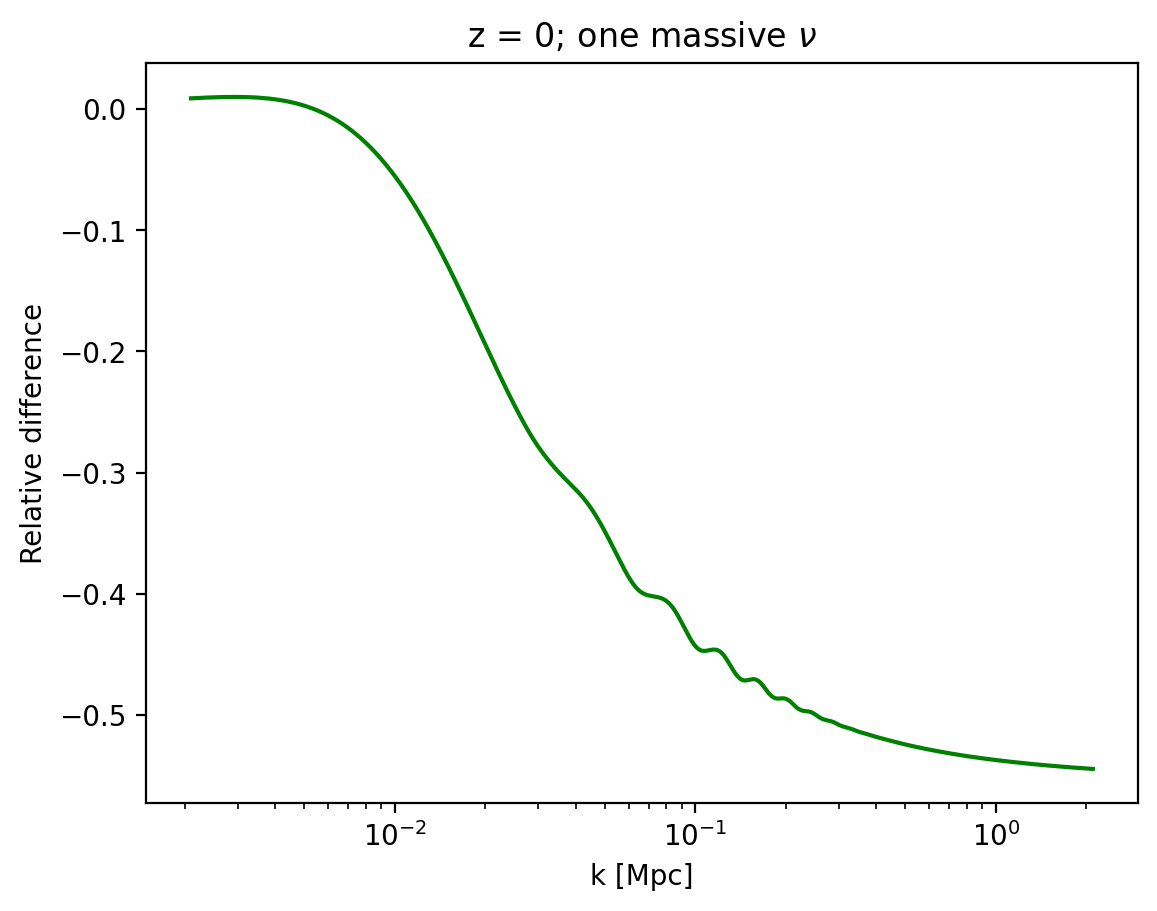

In [15]:
k_axis = k0 * modelK["h"]
p_axis = (p1[0] - p0[0]) / p0[0]

plt.title(r"z = 0; one massive $\nu$")
plt.ylabel("Relative difference")
plt.xlabel("k [Mpc]")
plt.plot(k_axis, p_axis, c="green")
plt.xscale("log")

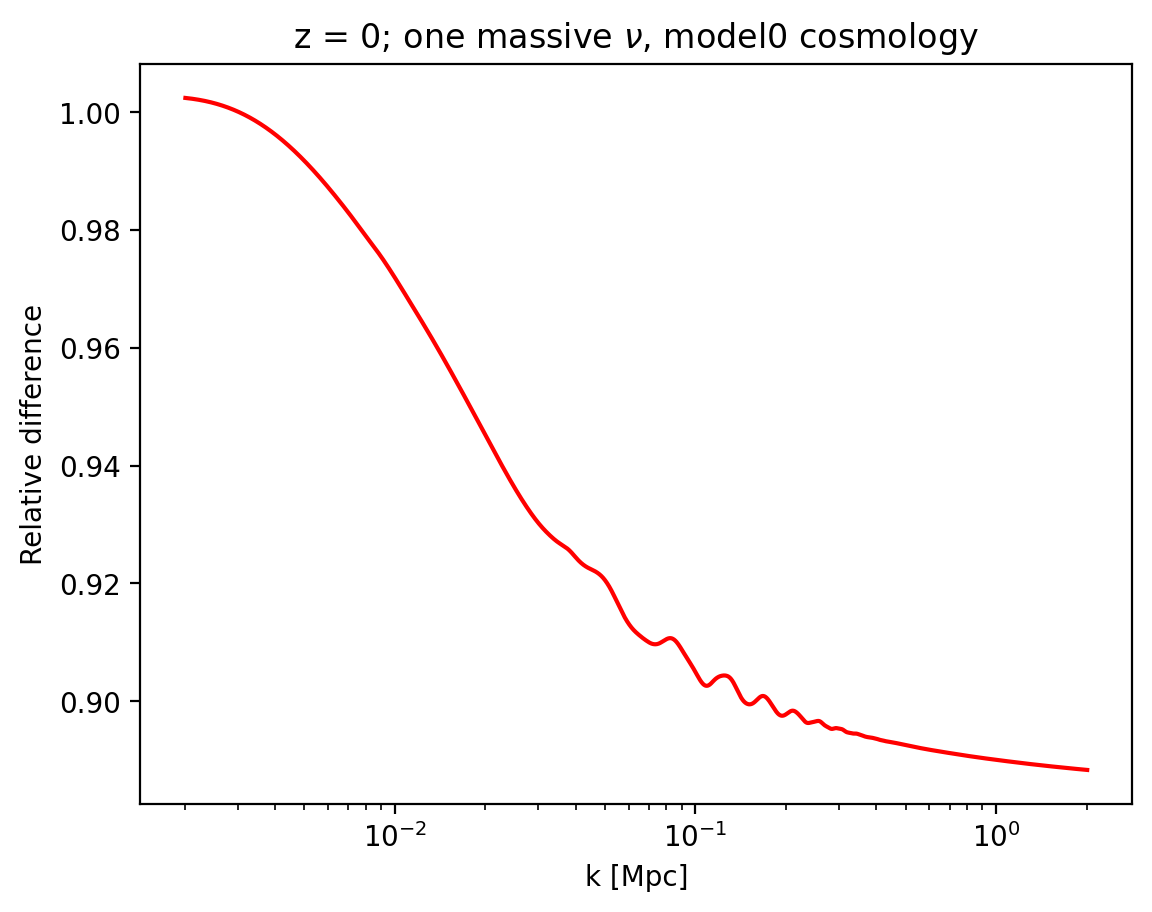

In [9]:
kb_axis = kb0 * model0["h"]
pb_axis = pb1[0] / pb0[0]

plt.title(r"z = 0; one massive $\nu$, model0 cosmology")
plt.ylabel("Relative difference")
plt.xlabel("k [Mpc]")
plt.plot(kb_axis, pb_axis, c="red")
#plt.plot(k_axis, p_axis, c="green")
plt.xscale("log")

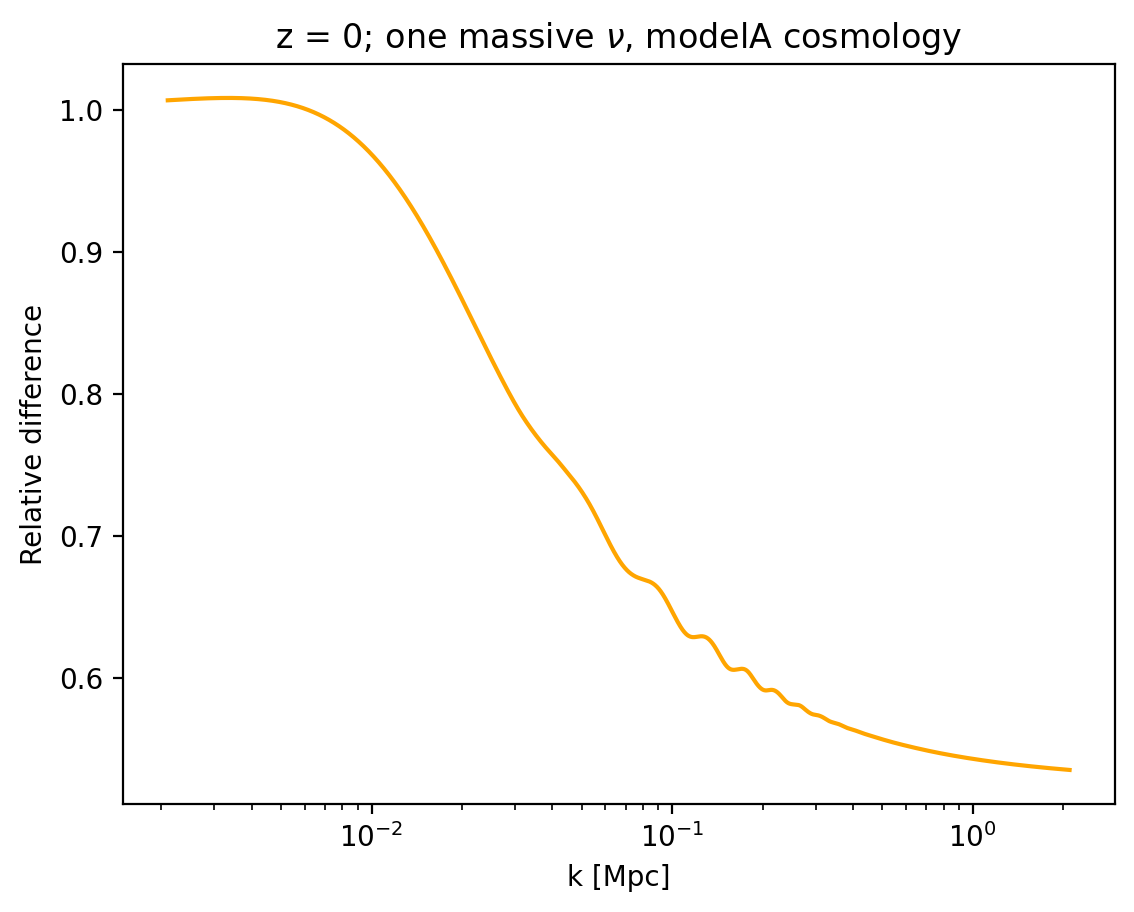

In [10]:
kA_axis = k0A * modelA["h"]
pA_axis = p1A[0] / p0A[0]

plt.title(r"z = 0; one massive $\nu$, modelA cosmology")
plt.ylabel("Relative difference")
plt.xlabel("k [Mpc]")
plt.plot(kA_axis, pA_axis, c="orange")
#plt.plot(k_axis, p_axis, c="green")
plt.xscale("log")

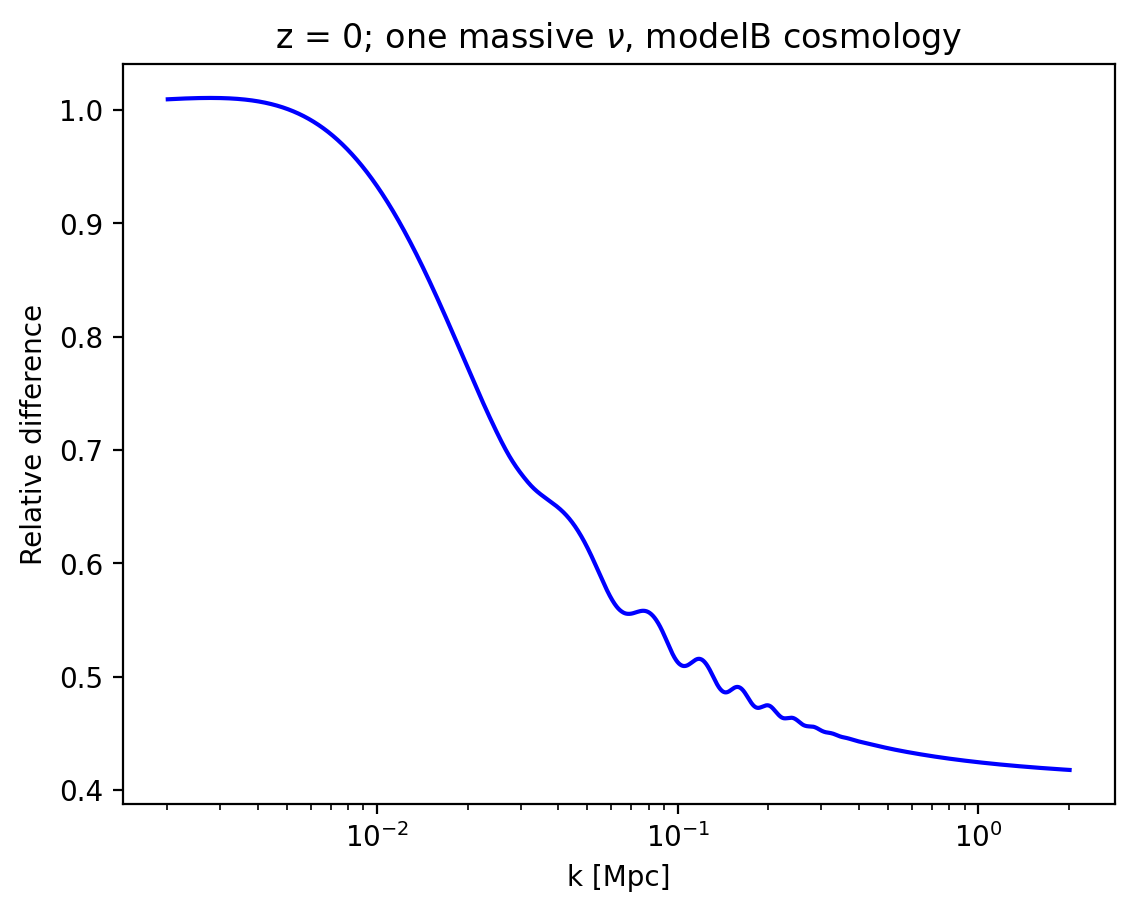

In [11]:
kB_axis = k0B * modelB["h"]
pB_axis = p1B[0] / p0B[0]

plt.title(r"z = 0; one massive $\nu$, modelB cosmology")
plt.ylabel("Relative difference")
plt.xlabel("k [Mpc]")
plt.plot(kB_axis, pB_axis, c="blue")
#plt.plot(k_axis, p_axis, c="green")
plt.xscale("log")

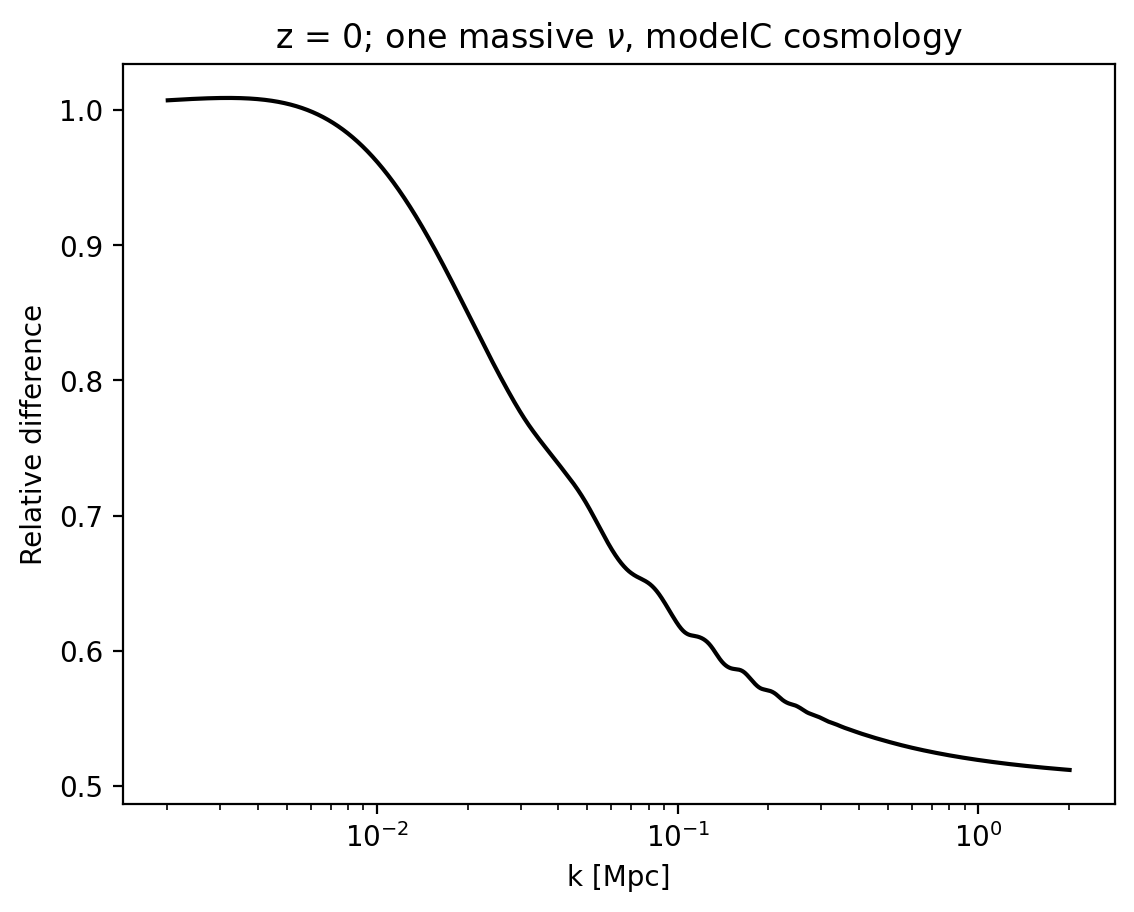

In [12]:
kC_axis = k0C * modelC["h"]
pC_axis = p1C[0] / p0C[0]

plt.title(r"z = 0; one massive $\nu$, modelC cosmology")
plt.ylabel("Relative difference")
plt.xlabel("k [Mpc]")
plt.plot(kC_axis, pC_axis, c="black")
#plt.plot(k_axis, p_axis, c="green")
plt.xscale("log")

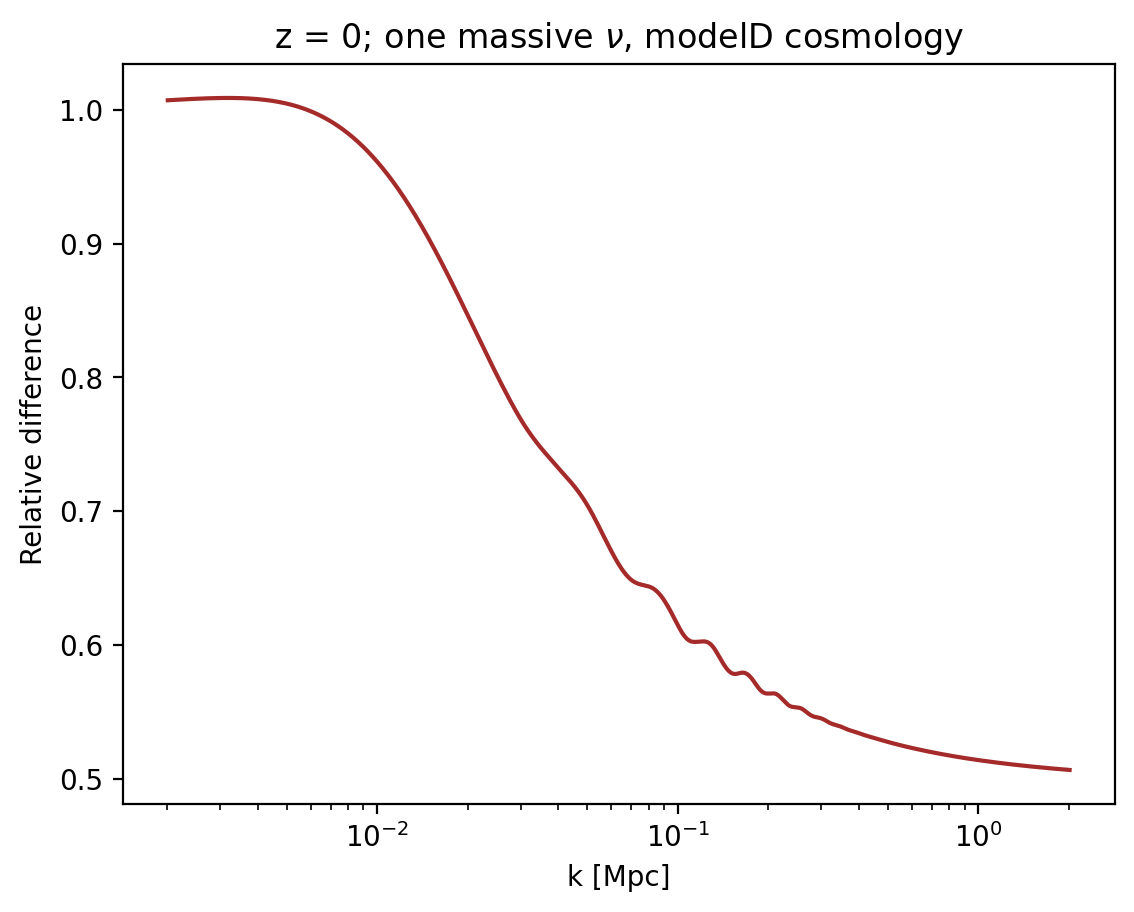

In [13]:
kD_axis = k0D * modelD["h"]
pD_axis = p1D[0] / p0D[0]

plt.title(r"z = 0; one massive $\nu$, modelD cosmology")
plt.ylabel("Relative difference")
plt.xlabel("k [Mpc]")
plt.plot(kD_axis, pD_axis, c="brown")
#plt.plot(k_axis, p_axis, c="green")
plt.xscale("log")

In [14]:
''' Frozen until we can figure out this segmentation fault.
k3, z3, p3, s123 = spectra.kzps(modelK, omnuh2_in, massive_neutrinos=True, nnu_massive_in=3)
p3_axis = (p3[0] - p0[0]) / p0[0]
plt.title(r"z = 0; three massive $\nu$")
plt.plot(k_axis, p3_axis, c="green")
plt.plot(k_axis, p_axis, c="red")
plt.xscale("log")
'''

' Frozen until we can figure out this segmentation fault.\nk3, z3, p3, s123 = spectra.kzps(modelK, omnuh2_in, massive_neutrinos=True, nnu_massive_in=3)\np3_axis = (p3[0] - p0[0]) / p0[0]\nplt.title(r"z = 0; three massive $\nu$")\nplt.plot(k_axis, p3_axis, c="green")\nplt.plot(k_axis, p_axis, c="red")\nplt.xscale("log")\n'

What we haven't addressed yet:
* How do we amplitude-match the Kiakotou plots?